In [2]:
import rosbag
import rospy
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bag_to_data(bagpath):
    jbagpath = bagpath # define path to bag file
    jbag = rosbag.Bag(jbagpath, 'r') # read bag file
    j_info_dict = yaml.load(jbag._get_yaml_info()) # load the yaml info file from the bag
    # for x in j1_info_dict['topics']:
    #     print(x)

    # topics of interest
    feedback = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/feedback'
    goal = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/goal'
    status = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/status'
    state = '/bbot/PositionJointInterface_trajectory_controller/state'
    state2 = '/bbot/joint_states'
    clock = '/clock'
    linkstates = '/gazebo/link_states'
    pid1 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_1/parameter_updates'
    pid2 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_2/parameter_updates'
    pid3 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_3/parameter_updates'
    pid4 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_4/parameter_updates'
    pid5 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_5/parameter_updates'
    pid6 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_6/parameter_updates'
    pid7 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_7/parameter_updates'
    paramupdates = '/gazebo/parameter_updates'
    paramdescription = '/gazebo/parameter_descriptions'

    # initialize vectors for plotting
    j_time = []
    j_desired = []
    j_actual = []
    j_error = []
    j_pid = np.zeros((7,3))

    # add data to vectors
    for topic, msg, type in jbag.read_messages():
        if topic == feedback:
            j_time.append(float(msg.feedback.header.stamp.secs) + float(msg.feedback.header.stamp.nsecs)/10.0**9)
            j_desired.append(msg.feedback.desired.positions)
            j_actual.append(msg.feedback.actual.positions)
            j_error.append(msg.feedback.error.positions)
#             print(msg)
        if topic == pid1:
            j_pid[0,0] = msg.doubles[0].value
            j_pid[0,1] = msg.doubles[1].value
            j_pid[0,2] = msg.doubles[2].value
        if topic == pid2:
            j_pid[1,0] = msg.doubles[0].value
            j_pid[1,1] = msg.doubles[1].value
            j_pid[1,2] = msg.doubles[2].value
        if topic == pid3:
            j_pid[2,0] = msg.doubles[0].value
            j_pid[2,1] = msg.doubles[1].value
            j_pid[2,2] = msg.doubles[2].value
        if topic == pid4:
            j_pid[3,0] = msg.doubles[0].value
            j_pid[3,1] = msg.doubles[1].value
            j_pid[3,2] = msg.doubles[2].value
        if topic == pid5:
            j_pid[4,0] = msg.doubles[0].value
            j_pid[4,1] = msg.doubles[1].value
            j_pid[4,2] = msg.doubles[2].value
        if topic == pid6:
            j_pid[5,0] = msg.doubles[0].value
            j_pid[5,1] = msg.doubles[1].value
            j_pid[5,2] = msg.doubles[2].value
        if topic == pid7:
            j_pid[6,0] = msg.doubles[0].value
            j_pid[6,1] = msg.doubles[1].value
            j_pid[6,2] = msg.doubles[2].value
    return j_time, j_desired, j_actual, j_error, j_pid;



# Joint 1

## Sim

In [6]:
# jbagpath = 'joint1_sim.bag'
# j_time, j_desired, j_actual, j_error, j_pid = bag_to_data(jbagpath)
# j_desired = [j_desired[0]*180/3.14 for j_desired in j_desired]
# j_actual = [j_actual[0]*180/3.14 for j_actual in j_actual]
# j_error = [j_error[0]*180/3.14 for j_error in j_error]

/home/dynamic/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


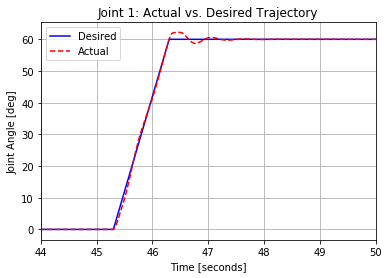

In [7]:
# plt.plot(j_time, j_desired, 'b-', label="Desired")
# plt.plot(j_time, j_actual, 'r--', label="Actual")
# plt.ylabel('Joint Angle [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 1: Actual vs. Desired Trajectory')
# plt.legend(loc="upper left")
# plt.xlim(44, 50)
# plt.grid()
# plt.show()

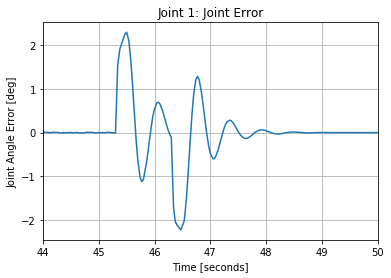

In [72]:
# plt.plot(j_time, j_error)
# plt.ylabel('Joint Angle Error [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 1: Joint Error')
# plt.grid()
# plt.xlim(44, 50)
# plt.show()

## Real
This plot is for a pure proportional controller with Kp = 850/128 = 6.64

In [8]:
j1_real_bagpath = 'joint1_real_p.bag'
j1_real_time, j1_real_desired, j1_real_actual, j1_real_error, j1_real_pid = bag_to_data(j1_real_bagpath)
j1_real_desired_1 = [j_d[0] for j_d in j1_real_desired]
j1_real_actual_1 = [j_a[0] for j_a in j1_real_actual]
# j1_real_error_1 = [j_e[0] for j_e in j1_real_error]

/home/dynamic/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


365


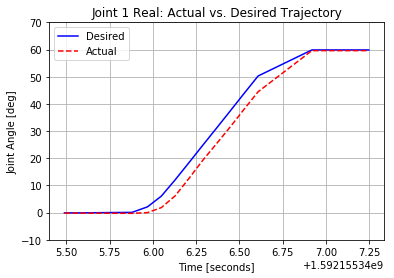

In [37]:
j1_real_start_index = 243
j1_real_end_index = 260
plt.plot(j1_real_time[j1_real_start_index:j1_real_end_index], j1_real_desired_1[j1_real_start_index:j1_real_end_index], 'b-', label="Desired")
plt.plot(j1_real_time[j1_real_start_index:j1_real_end_index], j1_real_actual_1[j1_real_start_index:j1_real_end_index], 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 1 Real: Actual vs. Desired Trajectory')
plt.legend(loc="upper left")
print(len(j1_real_time))
# plt.xlim(0, 300)
plt.ylim(-10, 70)
plt.grid()
plt.show()

# Joint 2

## Sim

In [73]:
# jbagpath = 'joint2_sim.bag'
# j_time, j_desired, j_actual, j_error, j_pid = bag_to_data(jbagpath)
# j_desired = [j_desired[1]*180/3.14 for j_desired in j_desired]
# j_actual = [j_actual[1]*180/3.14 for j_actual in j_actual]
# j_error = [j_error[1]*180/3.14 for j_error in j_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


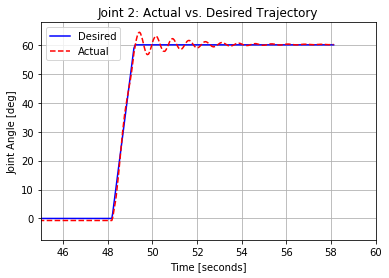

In [74]:
# plt.plot(j_time, j_desired, 'b-', label="Desired")
# plt.plot(j_time, j_actual, 'r--', label="Actual")
# plt.ylabel('Joint Angle [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 2: Actual vs. Desired Trajectory')
# plt.legend(loc="upper left")
# plt.xlim(45, 60)
# plt.grid()
# plt.show()

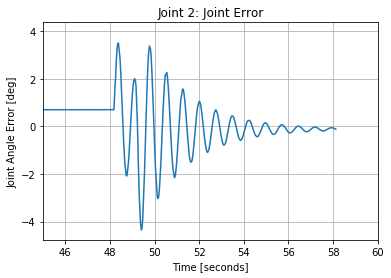

In [75]:
# plt.plot(j_time, j_error)
# plt.ylabel('Joint Angle Error [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 2: Joint Error')
# plt.grid()
# plt.xlim(45, 60)
# plt.show()

## Real
This plot is for a pure proportional controller with Kp = 850/128 = 6.64

In [19]:
j2_real_bagpath = 'joint2_real_p.bag'
j2_real_time, j2_real_desired, j2_real_actual, j2_real_error, j2_real_pid = bag_to_data(j2_real_bagpath)
j2_real_desired_2 = [j_d[1] for j_d in j2_real_desired]
j2_real_actual_2 = [j_a[1] for j_a in j2_real_actual]
# j1_real_error_1 = [j_e[0] for j_e in j1_real_error]

/home/dynamic/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


116


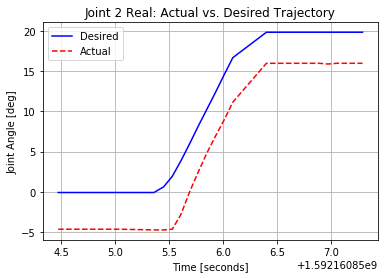

In [24]:
j2_real_start_index = 50
j2_real_end_index = 80
plt.plot(j2_real_time[j2_real_start_index:j2_real_end_index], j2_real_desired_2[j2_real_start_index:j2_real_end_index], 'b-', label="Desired")
plt.plot(j2_real_time[j2_real_start_index:j2_real_end_index], j2_real_actual_2[j2_real_start_index:j2_real_end_index], 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 2 Real: Actual vs. Desired Trajectory')
plt.legend(loc="upper left")
print(len(j2_real_time))
# plt.xlim(0, 300)
# plt.ylim(-10, 40)
plt.grid()
plt.show()

# Joint 3

## Sim

In [85]:
# jbagpath = 'joint3_sim.bag'
# j_time, j_desired, j_actual, j_error, j_pid = bag_to_data(jbagpath)
# j_desired = [j_desired[2]*180/3.14 for j_desired in j_desired]
# j_actual = [j_actual[2]*180/3.14 for j_actual in j_actual]
# j_error = [j_error[2]*180/3.14 for j_error in j_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


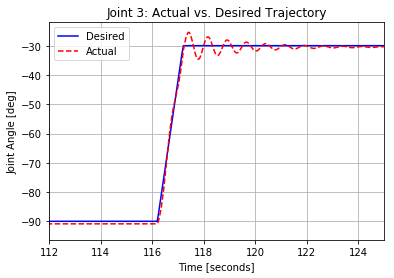

In [88]:
# plt.plot(j_time, j_desired, 'b-', label="Desired")
# plt.plot(j_time, j_actual, 'r--', label="Actual")
# plt.ylabel('Joint Angle [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 3: Actual vs. Desired Trajectory')
# plt.legend(loc="upper left")
# plt.xlim(112, 125)
# plt.grid()
# plt.show()

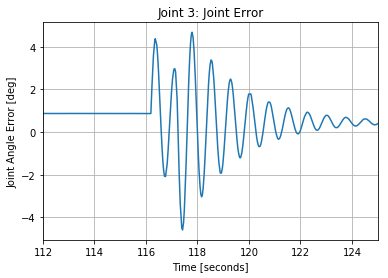

In [89]:
# plt.plot(j_time, j_error)
# plt.ylabel('Joint Angle Error [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 3: Joint Error')
# plt.grid()
# plt.xlim(112, 125)
# plt.show()

## Real

In [4]:
j3_real_bagpath = 'joint3_real_p.bag'
j3_real_time, j3_real_desired, j3_real_actual, j3_real_error, j3_real_pid = bag_to_data(j3_real_bagpath)
j3_real_desired_3 = [j_d[2] for j_d in j3_real_desired]
j3_real_actual_3 = [j_a[2] for j_a in j3_real_actual]
# j1_real_error_1 = [j_e[0] for j_e in j1_real_error]

/home/dynamic/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


116


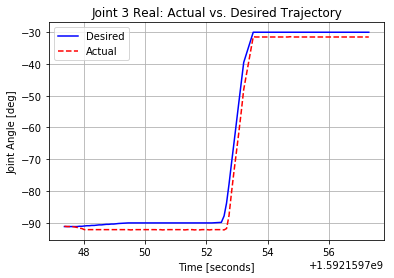

In [5]:
j3_real_start_index = 0
j3_real_end_index = 365
plt.plot(j3_real_time[j3_real_start_index:j3_real_end_index], j3_real_desired_3[j3_real_start_index:j3_real_end_index], 'b-', label="Desired")
plt.plot(j3_real_time[j3_real_start_index:j3_real_end_index], j3_real_actual_3[j3_real_start_index:j3_real_end_index], 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 3 Real: Actual vs. Desired Trajectory')
plt.legend(loc="upper left")
print(len(j3_real_time))
# plt.xlim(0, 300)
# plt.ylim(-10, 40)
plt.grid()
plt.show()

# Joint 4

## Sim

In [90]:
# jbagpath = 'joint4_sim.bag'
# j_time, j_desired, j_actual, j_error, j_pid = bag_to_data(jbagpath)
# j_desired = [j_desired[3]*180/3.14 for j_desired in j_desired]
# j_actual = [j_actual[3]*180/3.14 for j_actual in j_actual]
# j_error = [j_error[3]*180/3.14 for j_error in j_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


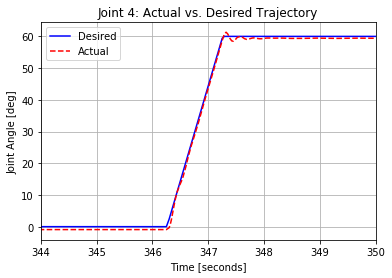

In [91]:
# plt.plot(j_time, j_desired, 'b-', label="Desired")
# plt.plot(j_time, j_actual, 'r--', label="Actual")
# plt.ylabel('Joint Angle [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 4: Actual vs. Desired Trajectory')
# plt.legend(loc="upper left")
# plt.xlim(344, 350)
# plt.grid()
# plt.show()

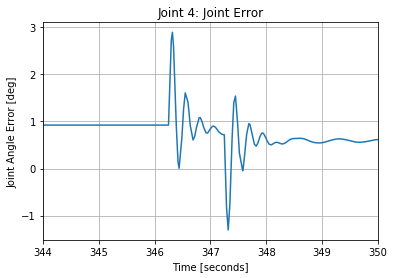

In [92]:
plt.plot(j_time, j_error)
plt.ylabel('Joint Angle Error [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 4: Joint Error')
plt.grid()
plt.xlim(344, 350)
plt.show()

## Real

In [17]:
j4_real_bagpath = 'joint4_real_p.bag'
j4_real_time, j4_real_desired, j4_real_actual, j4_real_error, j4_real_pid = bag_to_data(j4_real_bagpath)
j4_real_desired_4 = [j_d[3] for j_d in j4_real_desired]
j4_real_actual_4 = [j_a[3] for j_a in j4_real_actual]
# j1_real_error_1 = [j_e[0] for j_e in j1_real_error]

/home/dynamic/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


115


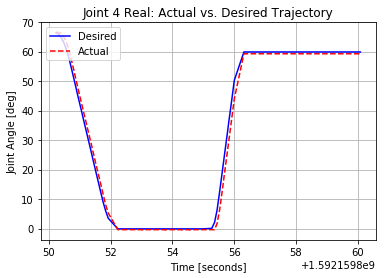

In [18]:
j4_real_start_index = 0
j4_real_end_index = 365
plt.plot(j4_real_time[j4_real_start_index:j4_real_end_index], j4_real_desired_4[j4_real_start_index:j4_real_end_index], 'b-', label="Desired")
plt.plot(j4_real_time[j4_real_start_index:j4_real_end_index], j4_real_actual_4[j4_real_start_index:j4_real_end_index], 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 4 Real: Actual vs. Desired Trajectory')
plt.legend(loc="upper left")
print(len(j4_real_time))
# plt.xlim(0, 300)
# plt.ylim(-10, 40)
plt.grid()
plt.show()

# Joint 5

## Sim

In [93]:
# jbagpath = 'joint5_sim.bag'
# j_time, j_desired, j_actual, j_error, j_pid = bag_to_data(jbagpath)
# j_desired = [j_desired[4]*180/3.14 for j_desired in j_desired]
# j_actual = [j_actual[4]*180/3.14 for j_actual in j_actual]
# j_error = [j_error[4]*180/3.14 for j_error in j_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


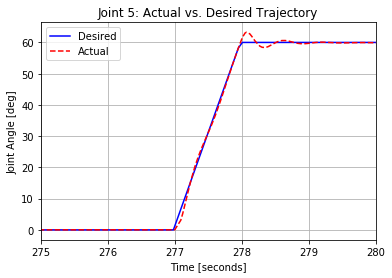

In [98]:
# plt.plot(j_time, j_desired, 'b-', label="Desired")
# plt.plot(j_time, j_actual, 'r--', label="Actual")
# plt.ylabel('Joint Angle [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 5: Actual vs. Desired Trajectory')
# plt.legend(loc="upper left")
# plt.xlim(275, 280)
# plt.grid()
# plt.show()

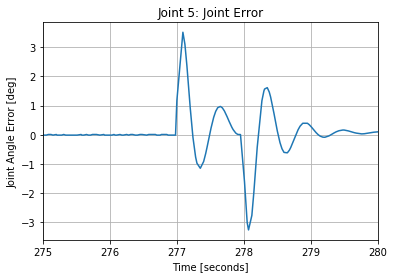

In [100]:
# plt.plot(j_time, j_error)
# plt.ylabel('Joint Angle Error [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 5: Joint Error')
# plt.grid()
# plt.xlim(275, 280)
# plt.show()

## Real

# Joint 6

## Sim

In [104]:
# jbagpath = 'joint6_sim.bag'
# j_time, j_desired, j_actual, j_error, j_pid = bag_to_data(jbagpath)
# j_desired = [j_desired[5]*180/3.14 for j_desired in j_desired]
# j_actual = [j_actual[5]*180/3.14 for j_actual in j_actual]
# j_error = [j_error[5]*180/3.14 for j_error in j_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


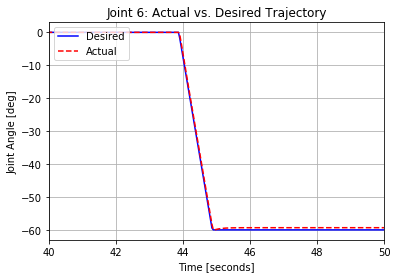

In [106]:
# plt.plot(j_time, j_desired, 'b-', label="Desired")
# plt.plot(j_time, j_actual, 'r--', label="Actual")
# plt.ylabel('Joint Angle [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 6: Actual vs. Desired Trajectory')
# plt.legend(loc="upper left")
# plt.xlim(40, 50)
# plt.grid()
# plt.show()

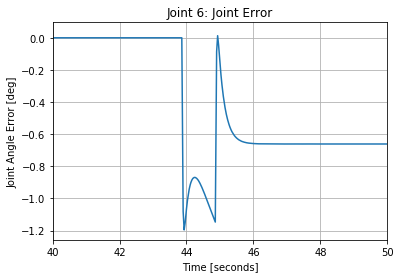

In [107]:
# plt.plot(j_time, j_error)
# plt.ylabel('Joint Angle Error [deg]')
# plt.xlabel('Time [seconds]')
# plt.title('Joint 6: Joint Error')
# plt.grid()
# plt.xlim(40, 50)
# plt.show()

## Real

# Full Trajectory
For a pure proportional controller with Kp = 6.64

In [25]:
motor = 6 # change this value to select which motor to plot
full_real_bagpath_p = 'full_traj_real_p.bag'
full_real_time_p, full_real_desired_p, full_real_actual_p, full_real_error_p, full_real_pid_p = bag_to_data(full_real_bagpath_p)
full_real_desired_p = [j_d[motor-1] for j_d in full_real_desired_p]
full_real_actual_p = [j_a[motor-1] for j_a in full_real_actual_p]

/home/dynamic/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


720


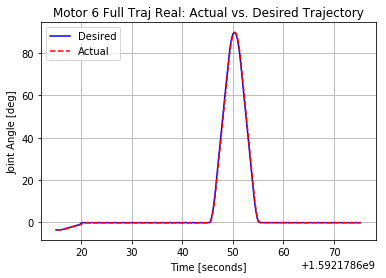

In [26]:
full_real_start_index_p = 0
full_real_end_index_p = 720
plt.plot(full_real_time_p[full_real_start_index_p:full_real_end_index_p], full_real_desired_p[full_real_start_index_p:full_real_end_index_p], 'b-', label="Desired")
plt.plot(full_real_time_p[full_real_start_index_p:full_real_end_index_p], full_real_actual_p[full_real_start_index_p:full_real_end_index_p], 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Motor ' + str(motor) + ' Full Traj Real: Actual vs. Desired Trajectory')
plt.legend(loc="upper left")
print(len(full_real_time_p))
# plt.xlim(0, 300)
# plt.ylim(-10, 40)
plt.grid()
plt.show()